# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
filepath = "../output_data/cities.csv"
df = pd.read_csv(filepath)
df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,81.00,83,40,9.17,US,1604608907
1,Alyangula,-13.85,136.42,80.60,88,19,5.82,AU,1604609368
2,Nikolskoye,59.70,30.79,46.40,75,20,17.90,RU,1604609084
3,Romny,50.75,33.47,40.08,94,0,7.70,UA,1604609371
4,Hong Kong,22.29,114.16,72.00,81,0,1.01,HK,1604609372


In [3]:
#  Get the indices of cities that have humidity over 100%.
df.loc[df['Humidity'] > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [4]:
df.shape

(570, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        570 non-null    object 
 1   Latitude    570 non-null    float64
 2   Longitude   570 non-null    float64
 3   Max Temp    570 non-null    float64
 4   Humidity    570 non-null    int64  
 5   Cloudiness  570 non-null    int64  
 6   Wind Speed  570 non-null    float64
 7   Country     565 non-null    object 
 8   Date        570 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.2+ KB


In [6]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.393386,16.811351,60.675421,70.510526,50.670175,8.414632,1.604610e+09
std,32.674659,91.397358,22.295736,21.469332,39.880930,6.458466,3.196411e+02
min,-54.800000,-179.170000,-24.750000,9.000000,0.000000,0.220000,1.604609e+09
25%,-6.407500,-65.225000,48.050000,58.000000,4.000000,3.807500,1.604609e+09
50%,21.635000,21.060000,67.075000,76.000000,53.000000,6.930000,1.604610e+09
75%,46.402500,98.417500,77.817500,87.000000,90.000000,11.227500,1.604610e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,51.270000,1.604610e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

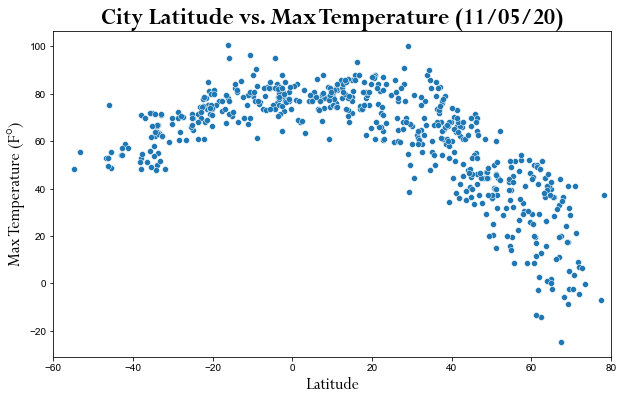

In [7]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Latitude'], y=df['Max Temp']) 
plt.title("City Latitude vs. Max Temperature (11/05/20)", fontsize=24, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Max Temperature (F°)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
sns.color_palette()

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Humidity Plot

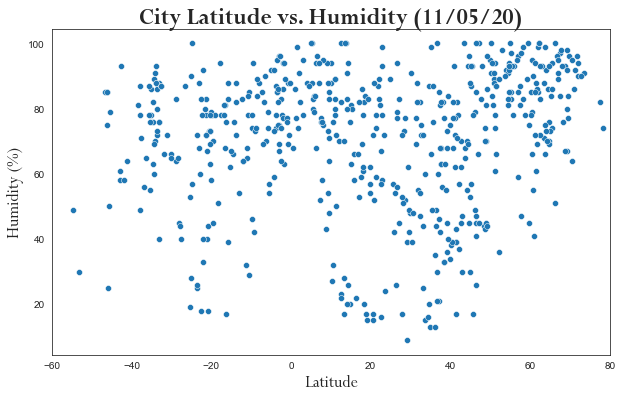

In [8]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Latitude'], y=df['Humidity']) 
plt.title("City Latitude vs. Humidity (11/05/20)", fontsize=24, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Humidity (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
sns.color_palette()

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Cloudiness Plot

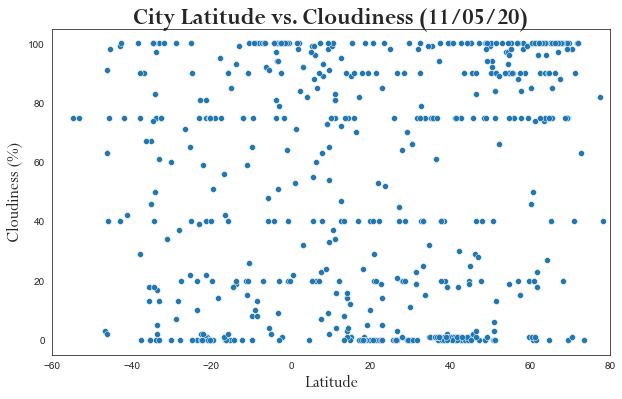

In [9]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Latitude'], y=df['Cloudiness']) 
plt.title("City Latitude vs. Cloudiness (11/05/20)", fontsize=24, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Cloudiness (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
sns.color_palette()

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Wind Speed Plot

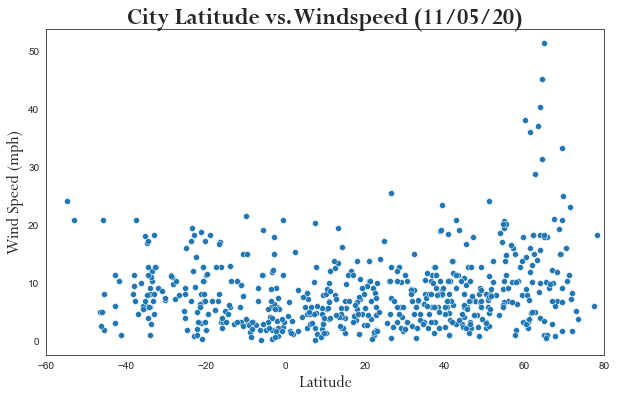

In [10]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Latitude'], y=df['Wind Speed']) 
plt.title("City Latitude vs. Windspeed (11/05/20)", fontsize=24, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Wind Speed (mph)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
sns.color_palette()

plt.xlim(-60, 80)

plt.show()

## Linear Regression

In [11]:
corrs = df.corr()
corrs

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Latitude,1.000000,-0.157758,-0.607350,0.111334,0.108389,0.172263,0.104605
Longitude,-0.157758,1.000000,-0.137697,0.335188,0.111651,-0.162778,0.051611
Max Temp,-0.607350,-0.137697,1.000000,-0.339883,-0.190155,-0.140000,0.147872
Humidity,0.111334,0.335188,-0.339883,1.000000,0.353049,-0.015955,0.006406
Cloudiness,0.108389,0.111651,-0.190155,0.353049,1.000000,0.065021,0.018860
Wind Speed,0.172263,-0.162778,-0.140000,-0.015955,0.065021,1.000000,-0.079147
Date,0.104605,0.051611,0.147872,0.006406,0.018860,-0.079147,1.000000


In [12]:
#Get North, South, East, and West Quadrants
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]
df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere_NS,Hemisphere_WE
0,Kapaa,22.08,-159.32,81.00,83,40,9.17,US,1604608907,Northern,Western
1,Alyangula,-13.85,136.42,80.60,88,19,5.82,AU,1604609368,Southern,Eastern
2,Nikolskoye,59.70,30.79,46.40,75,20,17.90,RU,1604609084,Northern,Eastern
3,Romny,50.75,33.47,40.08,94,0,7.70,UA,1604609371,Northern,Eastern
4,Hong Kong,22.29,114.16,72.00,81,0,1.01,HK,1604609372,Northern,Eastern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
target = df.loc[df.Hemisphere_NS == 'Northern']['Max Temp']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Northern']['Latitude'])

In [14]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max Temp   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     846.6
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           2.35e-99
Time:                        16:41:37   Log-Likelihood:                -1565.4
No. Observations:                 388   AIC:                             3135.
Df Residuals:                     386   BIC:                             3143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1187      1.495     62.963      0.000      91.180      97.058
Latitude      -1.0134      0.035    -29.097      0.000      -1.082      -0.945
==============================================================================
Omnibus:                       11.323   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.491
Skew:                          -0.393   Prob(JB):                      0.00320
Kurtosis:                       3.303   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -1.01x + 94.12'

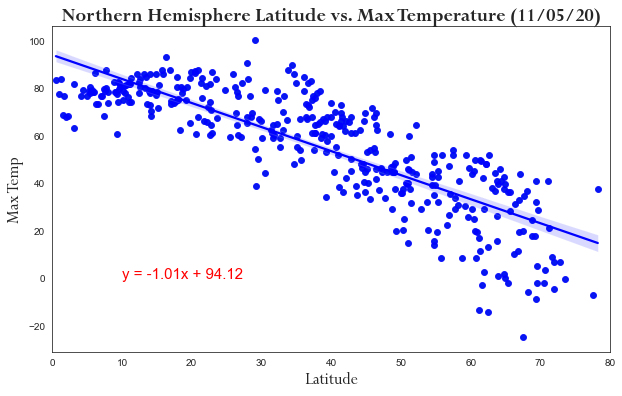

In [16]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Max Temp']) 
plt.title("Northern Hemisphere Latitude vs. Max Temperature (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Max Temperature (F°)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Max Temp'], color="b")
plt.xlim(0, 80)
plt.annotate(line_eq,(10, 0),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
target = df.loc[df.Hemisphere_NS == 'Southern']['Max Temp']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Southern']['Latitude'])

In [18]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max Temp   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     233.9
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           2.24e-34
Time:                        16:41:38   Log-Likelihood:                -610.84
No. Observations:                 182   AIC:                             1226.
Df Residuals:                     180   BIC:                             1232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.3787      0.937     89.009      0.000      81.530      85.227
Latitude       0.5903      0.039     15.294      0.000       0.514       0.667
==============================================================================
Omnibus:                       10.293   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.283
Skew:                           0.355   Prob(JB):                     0.000791
Kurtosis:                       4.175   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.59x + 83.38'

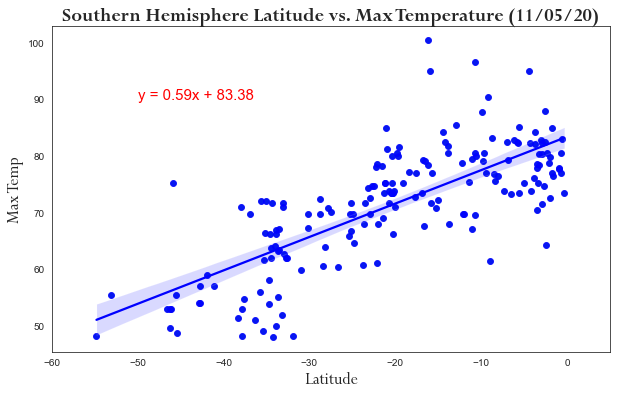

In [20]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Max Temp']) 
plt.title("Southern Hemisphere Latitude vs. Max Temperature (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Max Temperature (F°)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Max Temp'], color="b")
plt.xlim(-60, 5)
plt.annotate(line_eq,(-50, 90),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
target = df.loc[df.Hemisphere_NS == 'Northern']['Humidity']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Northern']['Latitude'])

In [22]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     18.80
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.86e-05
Time:                        16:41:38   Log-Likelihood:                -1755.7
No. Observations:                 388   AIC:                             3515.
Df Residuals:                     386   BIC:                             3523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0681      2.441     25.014      0.000      56.268      65.868
Latitude       0.2466      0.057      4.336      0.000       0.135       0.358
==============================================================================
Omnibus:                       31.984   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.667
Skew:                          -0.749   Prob(JB):                     6.62e-09
Kurtosis:                       2.710   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.25x + 61.07'

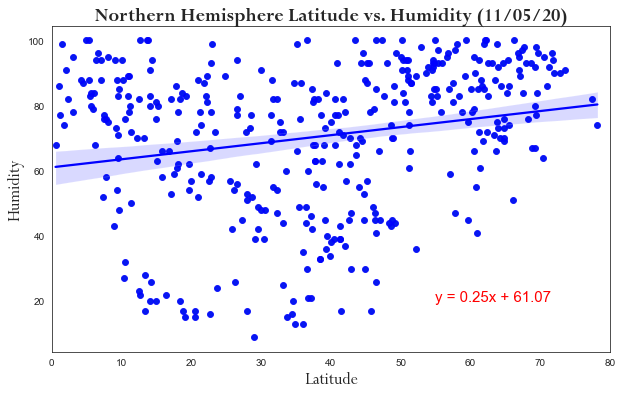

In [24]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Humidity']) 
plt.title("Northern Hemisphere Latitude vs. Humidity (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Humidity (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Humidity'], color="b")
plt.xlim(0, 80)
plt.annotate(line_eq,(55, 20),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
target = df.loc[df.Hemisphere_NS == 'Southern']['Humidity']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Southern']['Latitude'])

In [26]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.005
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0152
Time:                        16:41:39   Log-Likelihood:                -781.77
No. Observations:                 182   AIC:                             1568.
Df Residuals:                     180   BIC:                             1574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5653      2.396     31.538      0.000      70.837      80.293
Latitude       0.2419      0.099      2.450      0.015       0.047       0.437
==============================================================================
Omnibus:                       29.868   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.782
Skew:                          -1.056   Prob(JB):                     3.79e-09
Kurtosis:                       3.808   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.24x + 75.57'

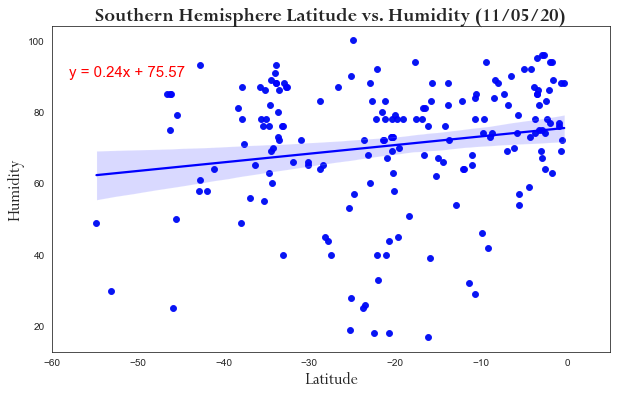

In [28]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Humidity']) 
plt.title("Southern Hemisphere Latitude vs. Humidity (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Humidity (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Humidity'], color="b")
plt.xlim(-60, 5)
plt.annotate(line_eq,(-58, 90),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
target = df.loc[df.Hemisphere_NS == 'Northern']['Cloudiness']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Northern']['Latitude'])

In [30]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     17.21
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           4.13e-05
Time:                        16:41:40   Log-Likelihood:                -1977.6
No. Observations:                 388   AIC:                             3959.
Df Residuals:                     386   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0052      4.324      8.095      0.000      26.503      43.507
Latitude       0.4179      0.101      4.148      0.000       0.220       0.616
==============================================================================
Omnibus:                     2979.193   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.249
Skew:                          -0.097   Prob(JB):                     1.82e-09
Kurtosis:                       1.434   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.42x + 35.01'

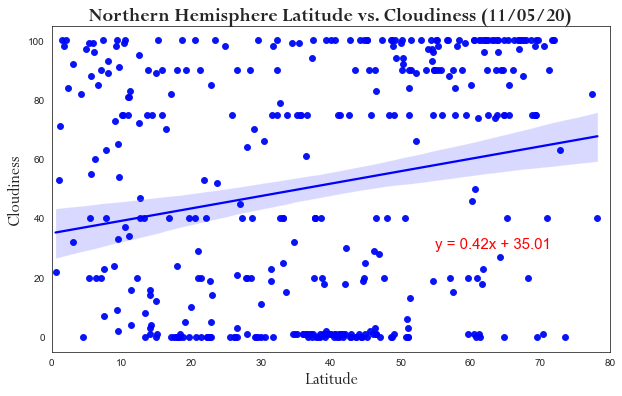

In [32]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Cloudiness']) 
plt.title("Northern Hemisphere Latitude vs. Cloudiness (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Cloudiness (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Cloudiness'], color="b")
plt.xlim(0, 80)
plt.annotate(line_eq,(55, 30),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [33]:
target = df.loc[df.Hemisphere_NS == 'Southern']['Cloudiness']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Southern']['Latitude'])

In [34]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.442
Date:                Thu, 05 Nov 2020   Prob (F-statistic):              0.120
Time:                        16:41:40   Log-Likelihood:                -921.70
No. Observations:                 182   AIC:                             1847.
Df Residuals:                     180   BIC:                             1854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9598      5.169     11.020      0.000      46.760      67.159
Latitude       0.3329      0.213      1.563      0.120      -0.087       0.753
==============================================================================
Omnibus:                     2075.607   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.448
Skew:                          -0.060   Prob(JB):                     5.98e-05
Kurtosis:                       1.403   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.33x + 56.96'

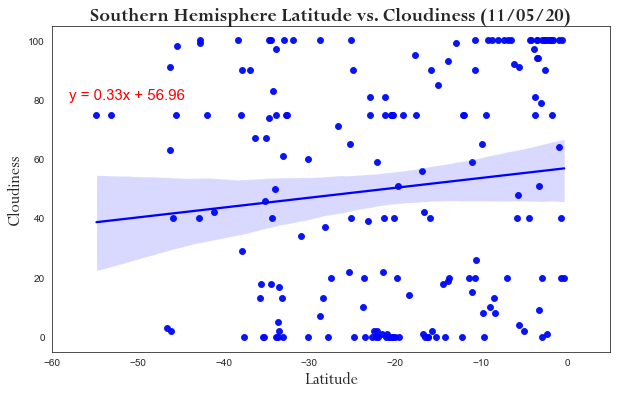

In [36]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Cloudiness']) 
plt.title("Southern Hemisphere Latitude vs. Cloudiness (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Cloudiness (%)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Cloudiness'], color="b")
plt.xlim(-60, 5)
plt.annotate(line_eq,(-58, 80),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [37]:
target = df.loc[df.Hemisphere_NS == 'Northern']['Wind Speed']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Northern']['Latitude'])

In [38]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind Speed   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     50.55
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           5.67e-12
Time:                        16:41:41   Log-Likelihood:                -1276.2
No. Observations:                 388   AIC:                             2556.
Df Residuals:                     386   BIC:                             2564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2037      0.709      5.926      0.000       2.809       5.598
Latitude       0.1175      0.017      7.110      0.000       0.085       0.150
==============================================================================
Omnibus:                      181.287   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.652
Skew:                           1.942   Prob(JB):                    8.59e-223
Kurtosis:                       9.941   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.12x + 4.2'

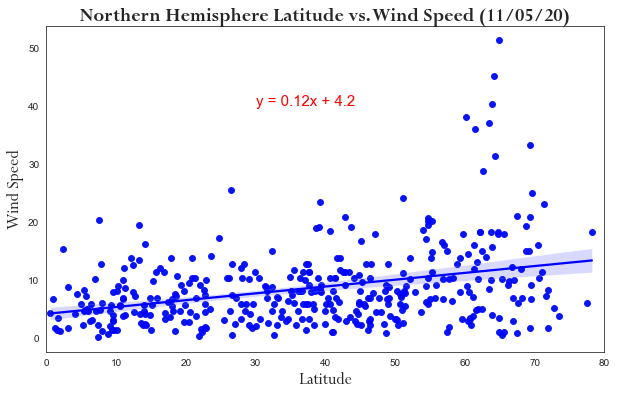

In [40]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Wind Speed']) 
plt.title("Northern Hemisphere Latitude vs. Wind Speed (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Wind Speed (mph)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Northern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Northern']['Wind Speed'], color="b")
plt.xlim(0, 80)
plt.annotate(line_eq,(30, 40),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [41]:
target = df.loc[df.Hemisphere_NS == 'Southern']['Wind Speed']
feature = sm.add_constant(df.loc[df.Hemisphere_NS == 'Southern']['Latitude'])

In [42]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind Speed   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     11.83
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           0.000725
Time:                        16:41:41   Log-Likelihood:                -557.03
No. Observations:                 182   AIC:                             1118.
Df Residuals:                     180   BIC:                             1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8782      0.697      8.434      0.000       4.503       7.253
Latitude      -0.0988      0.029     -3.439      0.001      -0.155      -0.042
==============================================================================
Omnibus:                       18.638   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.926
Skew:                           0.850   Prob(JB):                     1.73e-05
Kurtosis:                       3.063   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.1x + 5.88'

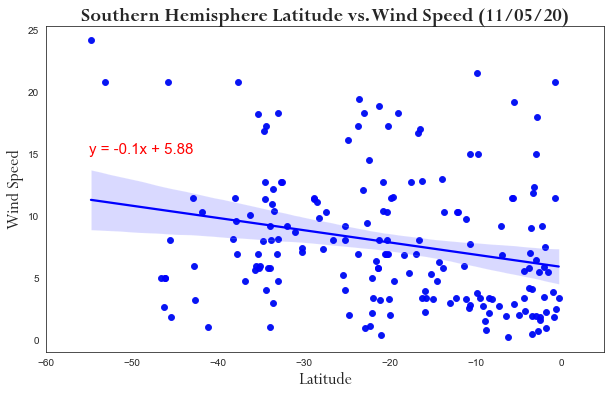

In [44]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Wind Speed']) 
plt.title("Southern Hemisphere Latitude vs. Wind Speed (11/05/20)", fontsize=20, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Latitude", fontsize = 18, fontname = "Perpetua")
plt.ylabel("Wind Speed (mph)", fontsize = 18, fontname = "Perpetua")
sns.set_style("white")
ax = sns.regplot(x=df.loc[df.Hemisphere_NS == 'Southern']['Latitude'], y=df.loc[df.Hemisphere_NS == 'Southern']['Wind Speed'], color="b")
plt.xlim(-60, 5)
plt.annotate(line_eq,(-55, 15),fontsize=15,color="red")

plt.show()